# Mini project - Superstore


Trong project này sử dụng bộ dữ liệu superstore về các hóa đơn được lưu trữ trong một file excel. File này chứa 3 bảng dữ liệu khác nhau bao gồm: Orders, Returns, People.

Những yêu cầu với bộ dữ liệu trên:
1. Lợi nhuận (profit) và doanh thu (sale) thay đổi như thế nào theo từng tháng?
2. So sánh tỷ lệ lợi nhuận (profit/sale) của từng tiểu bang trong năm 2017 (dữ liệu mới chỉ có đến 2017)?
3. Có bao nhiêu sản phẩm được trả lại (returned)? Những tiểu bang (state) và danh mục sản phẩm  (category) nào có tỷ lệ trả lại cao nhất?

Mình dùng Mysql để lấy dữ liệu phục vụ việc trả lời các câu hỏi.

Câu 1. Với câu hỏi 1 thì mình cần 3 thông tin là lợi nhuận (profit), doanh thu (sale) và thời gian (order_date). Cả 3 cột này đều ở một bảng là order. dùng sql để lấy dữ thành bảng gồm các cột: Doanh thu, lợi nhuận, tỷ lệ lợi nhuận = lợi nhuận/doanh thu, Tháng năm.
Dùng python để vẽ biểu đồ biểu diễn doanh thu, lợi nhuận, tỷ lệ lợi nhuận theo thời gian.

Câu 2. 
để trả lời câu hỏi này mình cần đến các thông tin: lợi nhuận (profit), doanh thu (sale), tiểu bang (state) và thời gian(order_date). 
Dùng sql để lấy dữ thành bảng gồm cột: tỷ lệ lợi nhuận và tiểu bang 
Câu 2 mình dùng Tableau để visualization

Câu 3.
để có tỷ lệ trả lại của mỗi tiểu bang và theo từng danh mục cần các thông tin: danh mục đơn hàng, tiểu bang và đơn hoàn trả từ 2 bảng orders và returns. 2 bảng này có cột chung là cột order_Id.
Dùng sql để lấy dữ liệu thành bảng có các cột: Tổng hóa đơn, tổng hóa đơn trả, tỷ lệ trả hàng = tổng hóa đơn trả/tổng hóa đơn, tiểu bang, danh mục.
Dùng Taleau để visualization.

In [1]:
#import các thư viện pandas và matplotlib
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#input dữ liệu là file csv export từ mysql
cau1 = pd.read_csv("D:\cau1.csv")
cau1.head()

,Doanh_Thu,Loi_Nhuan,Ty_Le_Loi_Nhuan,Thang_Nam
0,159982.8736,14860.5060,0.09,2017-12
1,224472.0640,18034.6604,0.08,2017-11
2,150040.3644,18002.1898,0.12,2017-10
3,157530.3640,17658.4694,0.11,2017-9
4,116100.3320,14920.7708,0.13,2017-8


In [3]:
#chuyển đổi tháng_năm thành định dạng ngày_tháng_năm
cau1['Thang_Nam'] = pd.to_datetime(cau1.Thang_Nam)
cau1.head()

,Doanh_Thu,Loi_Nhuan,Ty_Le_Loi_Nhuan,Thang_Nam
0,159982.8736,14860.5060,0.09,2017-12-01
1,224472.0640,18034.6604,0.08,2017-11-01
2,150040.3644,18002.1898,0.12,2017-10-01
3,157530.3640,17658.4694,0.11,2017-09-01
4,116100.3320,14920.7708,0.13,2017-08-01


C:\Users\Adminis\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


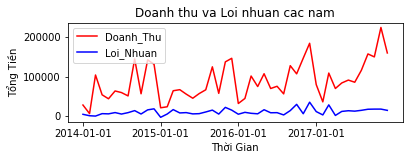

In [4]:
#plot doanh_thu va loi_nhuan
#tao khung plot 2x1 va chon vi tri dau tien
plt.subplot(2,1,1)
#plot 1 line cho doanh_thu
plt.plot(cau1['Thang_Nam'], cau1['Doanh_Thu'],label ='Doanh_Thu', c ='red')
#plot 1 line cho loi_nhuan
plt.plot(cau1['Thang_Nam'], cau1['Loi_Nhuan'],label ='Loi_Nhuan', c ='blue')
#cho hien chu thich
plt.legend()
plt.title("Doanh thu va Loi nhuan cac nam")
#dat ten cho truc X
plt.xlabel('Thời Gian')
#đặt tên cho trục Y
plt.ylabel("Tổng Tiền")
#chỉ giữ lại những tháng cố định trên thanh thời gian
plt.gca().axes.get_xaxis().set_ticks(['2014','2015', '2016','2017'])
plt.show()

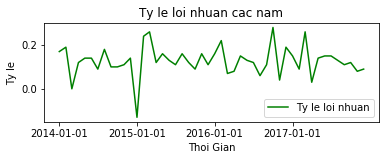

In [5]:
#plot ty_le_loi_nhuan

plt.subplot(2,1,2)
plt.plot(cau1['Thang_Nam'], cau1.Ty_Le_Loi_Nhuan, label='Ty le loi nhuan', c ='green')
plt.title("Ty le loi nhuan cac nam")

plt.xlabel('Thoi Gian')
plt.ylabel('Ty le')

#chi giu lai nhung thang co dinh tren thanh thoi gian
plt.gca().axes.get_xaxis().set_ticks(['2014','2015','2016','2017'])


plt.legend()
plt.show()